# Exploring Various Clustering Techniques

## Part1: K Means

In [3]:
from keras.datasets import fashion_mnist
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import cv2
from skimage import io
from sklearn.decomposition import PCA
import pandas as pd

In [4]:
# Implementation of elbow method from scratch

def elbow(km,i,sse):
    y_pred = km.fit_predict(X)
    medians = km.cluster_centers_
    df2 = pd.DataFrame( medians ).reset_index().rename({'index':'label'}, axis = 1)
    y_pred = y_pred.reshape(len(y_pred),1)
   
    z = X.shape[1]
    
    df1 = pd.DataFrame( np.concatenate((X,y_pred), axis = 1) )
    df1.rename({len(df1.columns)-1:'label'}, axis = 1, inplace = True)
    df3 = df1.merge(df2, how='left', on = 'label')
    
    arr1 = np.array( df3.iloc[:,:z] )
    arr2 = np.array( df3.iloc[:,z+1:] )
    
    avg_wcss = np.sum( np.square(arr2-arr1) )/len(X) 
    sse[i] = avg_wcss


In [5]:
# Silhouette method from scratch
def silhouette(kmeans,k,X,x,y):
    label = kmeans.labels_
    sil_score = silhouette_score(X, label, metric='euclidean')
    x.append(k)
    y.append(sil_score)



In [6]:
# LOADING THE DATASET. Take only the test split (10000 samples)

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
Y = np.copy(testy)
print("10K images flattened: " , X.shape , " and 10k labels: " , Y.shape)
print(np.unique(Y))


4422102/4422102 [==============================] - 0s 0us/step
10K images flattened:  (10000, 784)  and 10k labels:  (10000,)
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scal)
labels = kmeans.labels_

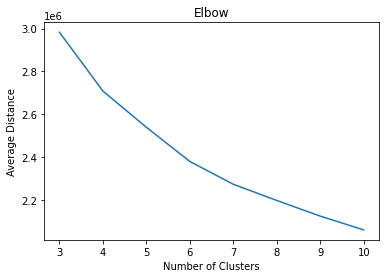

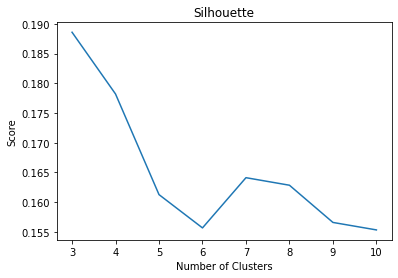

In [9]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)

###     ELBOW
sse = {}
for k in range(3,11):
  kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
  elbow(kmeans,k,sse)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance")
plt.title('Elbow')
plt.show()

####    SILHOUTTE
x=[]
y=[]
for k in range(3,11):
  kmeans = KMeans(n_clusters=k).fit(X)
  silhouette(kmeans,k,X,x,y)

plt.plot(x, y)
plt.ylabel('Score')
plt.xlabel('Number of Clusters')
plt.title('Silhouette')
plt.show()

Number of clusters found are 6

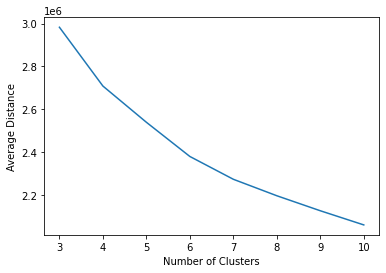

In [10]:
sse = {}
for k in range(3,11):
  kmeans = KMeans(n_clusters=k, max_iter=1000,init="random").fit(X)
  elbow(kmeans,k,sse)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distance")
plt.show()

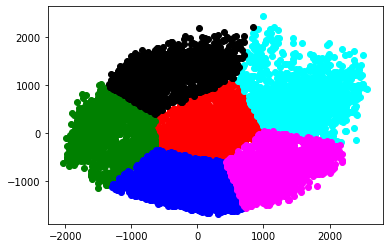

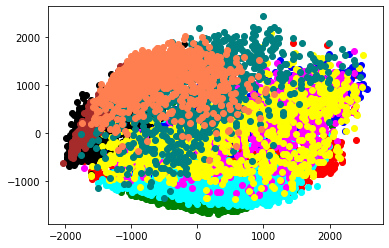

In [11]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. 
# You can show the original ground truth labels in one plot and then the predicted clusters in another plot)

pca = PCA(2)

reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters= 6)
 
label = kmeans.fit_predict(reduced)

colors = ['red','green','blue','cyan','magenta','black','yellow','brown','teal','coral']
for l in np.unique(label):
  filtered = reduced[label == l]
  plt.scatter(filtered[:,0] , filtered[:,1] , color = colors[l])
plt.show()

for l in np.unique(Y):
  filtered = reduced[Y == l]
  plt.scatter(filtered[:,0] , filtered[:,1] , color = colors[l])
plt.show()


## Part2: Hierarchical clustering

In [12]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering():
  hierarchical_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
  return hierarchical_cluster


hierarchical_cluster = hierarchical_clustering()
hierarchical_cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

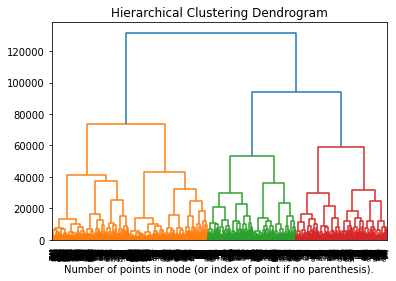

In [13]:
#visualize a dendogram
from scipy.cluster.hierarchy import dendrogram

def plot_dendogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack(
      [model.children_, model.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

  


plt.title("Hierarchical Clustering Dendrogram")

plot_dendogram(hierarchical_cluster, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

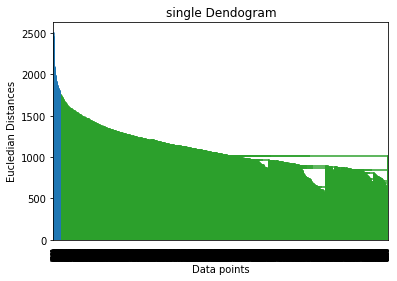

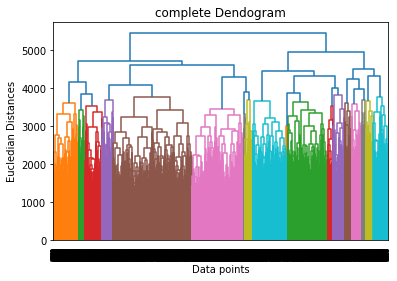

In [14]:
#visualisation of clusters using single linkage and complete linkage


def dendogram(meth):
  dendogram = sch.dendrogram(sch.linkage(X,method = meth))
  plt.title(meth+" Dendogram")
  plt.ylabel("Eucledian Distances")
  plt.xlabel("Data points")
  plt.show()
   
import sys
recursion_depth = sys.getrecursionlimit()
sys.setrecursionlimit(10**7)

dendogram('single')

dendogram('complete')

sys.setrecursionlimit(recursion_depth)


## Part3: Image Compression

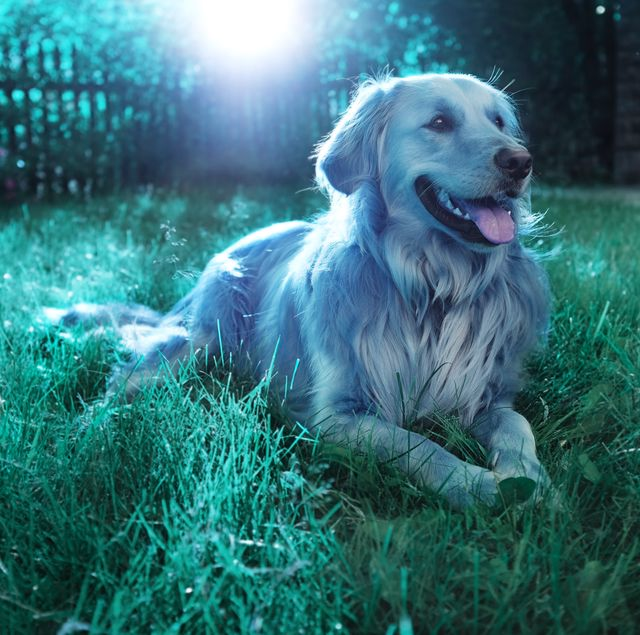

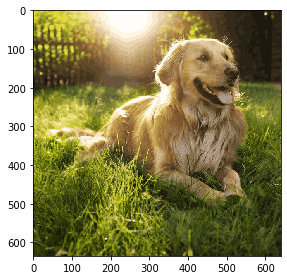

91.66568241469817


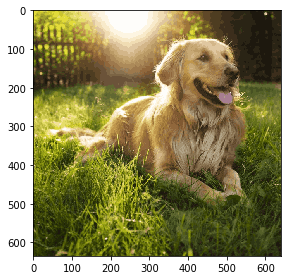

87.49852362204724


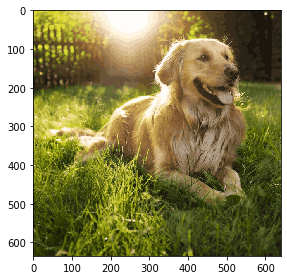

83.33038057742782


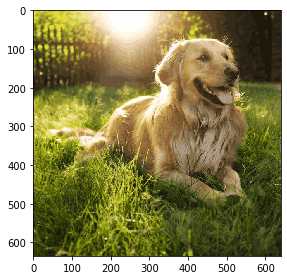

79.1622375328084


In [ ]:
# Boiler plate code
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)


# cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

k_values = [4,6,12,18,40,50,60,74]
for k in k_values:
  kmeans = KMeans(n_clusters=64)
  kmeans.fit(X)


  compressed_image = kmeans.cluster_centers_[kmeans.labels_]
  compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)


  compressed_image = compressed_image.reshape(img_size[0], img_size[1], 3)
  io.imsave('compressed_image_64.png', compressed_image)
  io.imshow(compressed_image)
  io.show()


  height, width, depth = img.shape
  size_n = height * width * depth
  size_n=size_n*8
  bits_n = int(np.ceil(np.log2(k)))
  compressed_size = k * 24
  c_size=compressed_size + height * width * bits_n
  data_reduction = (1 - c_size / size_n) * 100
  print(data_reduction)